In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import glob
import os

0. 이미지 리사이즈

In [63]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = ("/content/drive/MyDrive/Colab Notebooks/rock_scissor_paper/scissor")
resize_images(image_dir_path)

100  images to be resized.
100  images resized.


In [64]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = ("/content/drive/MyDrive/Colab Notebooks/rock_scissor_paper/rock")
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [65]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = ("/content/drive/MyDrive/Colab Notebooks/rock_scissor_paper/paper")
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


1. 라벨링 및 정규화

In [83]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = ("/content/drive/MyDrive/Colab Notebooks/rock_scissor_paper/")
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  1


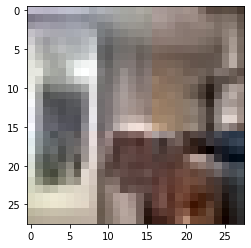

In [89]:
plt.imshow(x_train[140])
print('라벨: ', y_train[140])

2. 딥러닝 네트워크 설계하기

In [74]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 800)               0         
                                                                 
 dense_16 (Dense)            (

3. 딥러닝 네트워크 학습시키기

In [75]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=20)

Epoch 1/20
10/10 [==============================] - 1s 18ms/step - loss: 1.8051 - accuracy: 0.3333
Epoch 2/20
10/10 [==============================] - 0s 18ms/step - loss: 1.1279 - accuracy: 0.3600
Epoch 3/20
10/10 [==============================] - 0s 20ms/step - loss: 1.0090 - accuracy: 0.4967
Epoch 4/20
10/10 [==============================] - 0s 19ms/step - loss: 0.9274 - accuracy: 0.5767
Epoch 5/20
10/10 [==============================] - 0s 18ms/step - loss: 0.8381 - accuracy: 0.6933
Epoch 6/20
10/10 [==============================] - 0s 19ms/step - loss: 0.7970 - accuracy: 0.6433
Epoch 7/20
10/10 [==============================] - 0s 18ms/step - loss: 0.6573 - accuracy: 0.8000
Epoch 8/20
10/10 [==============================] - 0s 20ms/step - loss: 0.5367 - accuracy: 0.9133
Epoch 9/20
10/10 [==============================] - 0s 18ms/step - loss: 0.4263 - accuracy: 0.9100
Epoch 10/20
10/10 [==============================] - 0s 29ms/step - loss: 0.3424 - accuracy: 0.9233
Epoch 11/

4. 테스트

In [95]:
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = ("/content/drive/MyDrive/Colab Notebooks/rock_scissor_paper/test/scissor")
resize_images(image_dir_path)

print("테스트 이미지 resize 완료!")

# [[YOUR CODE]]
image_dir_path = ("/content/drive/MyDrive/Colab Notebooks/rock_scissor_paper/test")
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_test_norm.shape))
print("y_train shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
테스트 이미지 resize 완료!
학습데이터(x_train)의 이미지 개수는 100 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


In [96]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))


10/10 - 0s - loss: 2.0776 - accuracy: 0.1500 - 84ms/epoch - 8ms/step
test_loss: 2.077601194381714 
test_accuracy: 0.15000000596046448


# 회고  
이번 익스 역시 나자신이 많이 부족하다는 것을 알게 된 과제였다.  
코드를 짜는데 있어서는 여전히 어려웠고 아직 많이 헤매고 있다는 느낌을 많이 받았다.  
노드의 진행대로 했지만 정확도가 엄청 낮게 나와서 충격이였다.  